In [34]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import scipy.stats as stats

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [35]:
data=pd.read_csv("train_BRCpofr.csv")
pd.set_option("display.max_columns",None)

In [36]:
testdata=pd.read_csv("test_koRSKBP.csv")

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,89392.0,44696.500000,25805.391969,1.0,22348.75,44696.5,67044.25,89392.0
marital_status,89392.0,0.575488,0.494272,0.0,0.00,1.0,1.00,1.0
vintage,89392.0,4.595669,2.290446,0.0,3.00,5.0,6.00,8.0
claim_amount,89392.0,4351.502416,3262.359775,0.0,2406.00,4089.0,6094.00,31894.0
cltv,89392.0,97952.828978,90613.814793,24828.0,52836.00,66396.0,103440.00,724068.0


In [39]:
# lets start with the noise in the data
data.head()


# income column,num_of_policies both need to be treated 

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [40]:
#duplicacy
data[data.duplicated()]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv


In [41]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [42]:
data['marital_status']=data['marital_status'].astype(object)
data['vintage']=data['vintage'].astype(object)

In [43]:
data.income.unique()

array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object)

In [44]:
data.num_policies.unique()

array(['More than 1', '1'], dtype=object)

In [45]:
num=data.select_dtypes(include=np.number)
cat=data.select_dtypes(exclude=np.number)


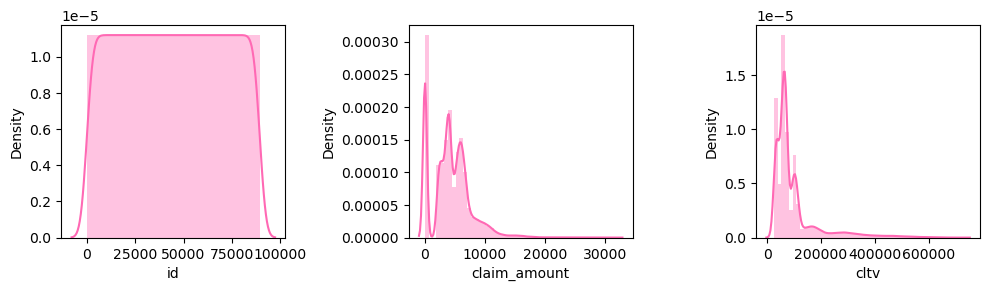

In [46]:
# univeriate analysis
plt.rcParams["figure.figsize"]=[10,8]
a=3
b=3
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.distplot(num[i],color="hotpink")
    c+=1
    plt.tight_layout()
plt.show()

# infrences
* claim amount is 0 in most of the cases
* target column 'CLTV' is skewed

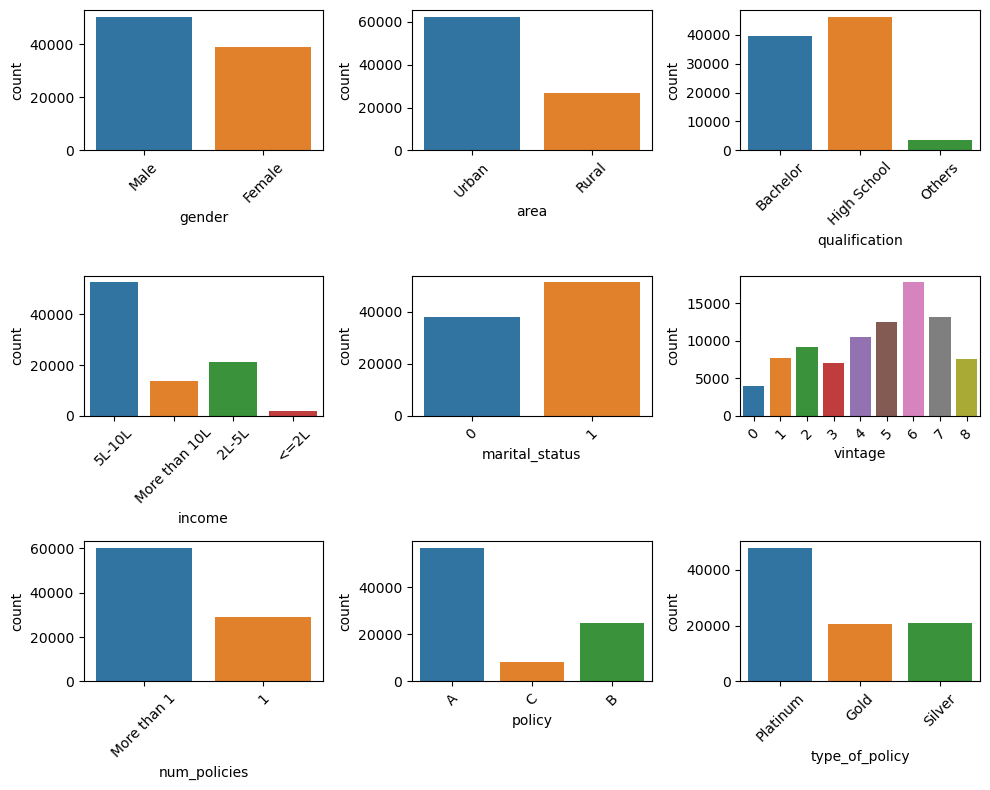

In [47]:
# univeriate analysis
plt.rcParams["figure.figsize"]=[10,8]
a=3
b=3
c=1
for i in cat:
    plt.subplot(a,b,c)
    sns.countplot(cat[i])
    c+=1
    plt.tight_layout()
    plt.xticks(rotation=45)
plt.show()

# inferences
* males got more number of records
* urban people > rural people
* people with high school qualification are more
* most of the people has income bracket of 5-10LPA
* number of polices more than 1 is preffered
* policy type A is most
* type_of_policy platinum is higher 

# Biveriate analysis


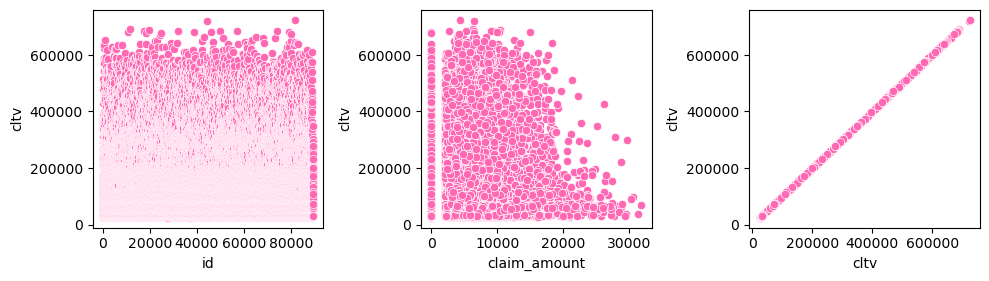

In [48]:
#num vs target
plt.rcParams["figure.figsize"]=[10,8]
a=3
b=3
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.scatterplot(num[i],data.cltv,color="hotpink")
    c+=1
    plt.tight_layout()
plt.show()

# inferences
* with the increase in claim amount cltv is reducing

# Biveriate for categorical

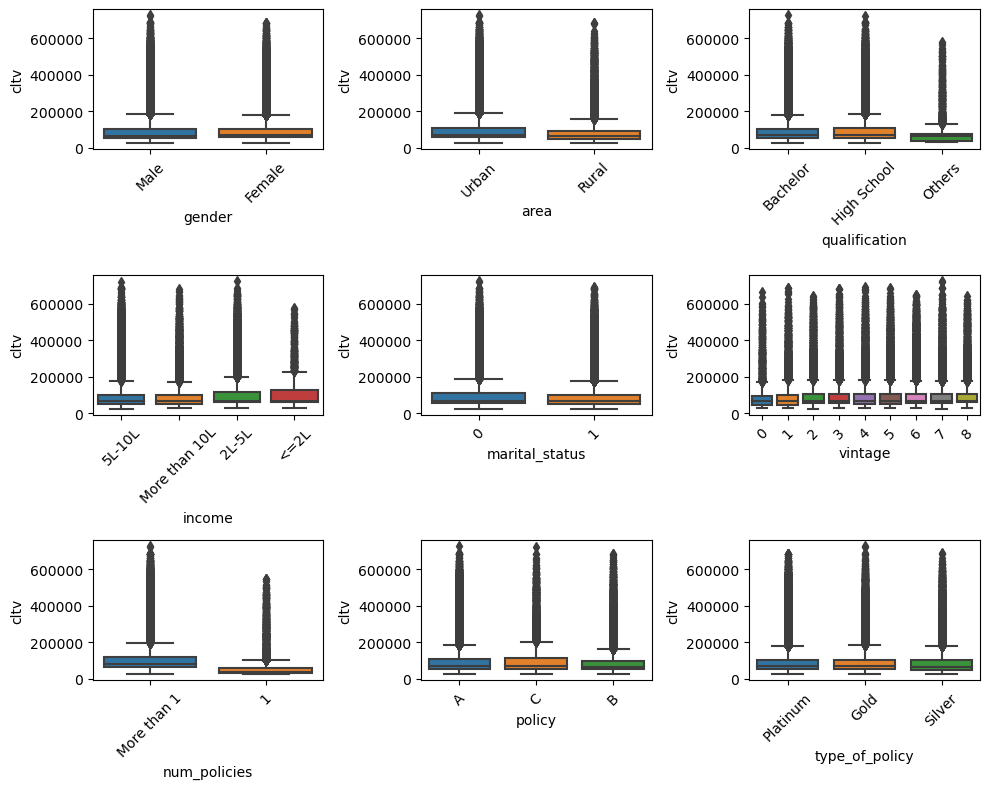

In [49]:
#cat vs target
plt.rcParams["figure.figsize"]=[10,8]
a=3
b=3
c=1
for i in cat:
    plt.subplot(a,b,c)
    sns.boxplot(cat[i],data.cltv)
    c+=1
    plt.tight_layout()
    plt.xticks(rotation=45)
plt.show()

# inferences 
* Outliers to be treated
* since we need to make an interprietable  model we need to ensure to
  match the linear model assumption
    

# checking for missing values

In [50]:
data.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [51]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  object
 6   vintage         89392 non-null  object
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 8.2+ MB


In [53]:
data[data.claim_amount==0]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
5,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
6,7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920
9,10,Male,Rural,High School,More than 10L,1,6,0,More than 1,A,Platinum,99060
16,17,Male,Rural,Bachelor,5L-10L,0,5,0,1,A,Silver,29124
...,...,...,...,...,...,...,...,...,...,...,...,...
89379,89380,Female,Rural,High School,5L-10L,0,5,0,1,B,Platinum,32472
89384,89385,Female,Rural,Bachelor,2L-5L,0,7,0,More than 1,B,Platinum,171828
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [54]:
num.head()

,id,claim_amount,cltv
0,1,5790,64308
1,2,5080,515400
2,3,2599,64212
3,4,0,97920
4,5,3508,59736


In [55]:
 num.drop("id",axis=1,inplace=True)

# Outliers treatment

In [56]:
# by capping
for i in num:
    if i != 'cltv':
        q1,q3=np.quantile(num[i],(0.25,0.75))
        iqr = q3-q1
        ul = q3+iqr*1.5
        ll = q1-iqr*1.5
        num.loc[num[i]>ul,i]=ul
        num.loc[num[i]<ll,i]=ll

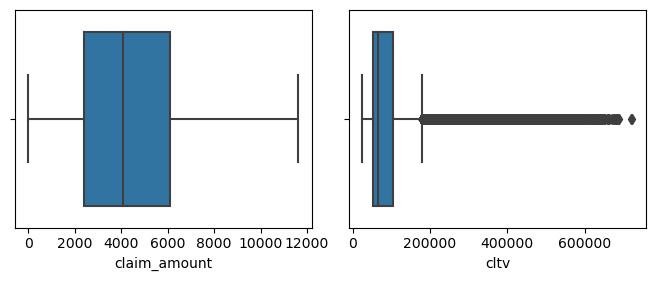

In [57]:
#num vs target
plt.rcParams["figure.figsize"]=[10,8]
a=3
b=3
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.boxplot(num[i])
    c+=1
    plt.tight_layout()
plt.show()

In [58]:
encode=pd.get_dummies(cat,drop_first=True)

In [59]:
finaldata=pd.concat([num,encode],axis=1)

In [60]:
# we are good to go for more building and we will try linear model as our base model 
#because stats model is biased for categories and we have more category columns

In [61]:
finaldata.head()

,claim_amount,cltv,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,marital_status_1,vintage_1,vintage_2,vintage_3,vintage_4,vintage_5,vintage_6,vintage_7,vintage_8,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,5790,64308,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
1,5080,515400,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,2599,64212,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
3,0,97920,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,3508,59736,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [62]:
#############################################


In [63]:
X=finaldata.drop("cltv",axis=1)

In [64]:
# VIF Calculation 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_list=[]
for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(X.values,i))
    
    

In [65]:
vif=pd.DataFrame({"Features":X.columns,"VIF":vif_list})

In [66]:
vif.sort_values(ascending=False,by="VIF")

,Features,VIF
2,area_Urban,4.366691
0,claim_amount,4.068680
5,income_5L-10L,3.231075
14,vintage_6,3.113852
17,num_policies_More than 1,3.106795
20,type_of_policy_Platinum,3.087668
15,vintage_7,2.582888
13,vintage_5,2.469938
8,marital_status_1,2.309524
1,gender_Male,2.287532


<AxesSubplot:>

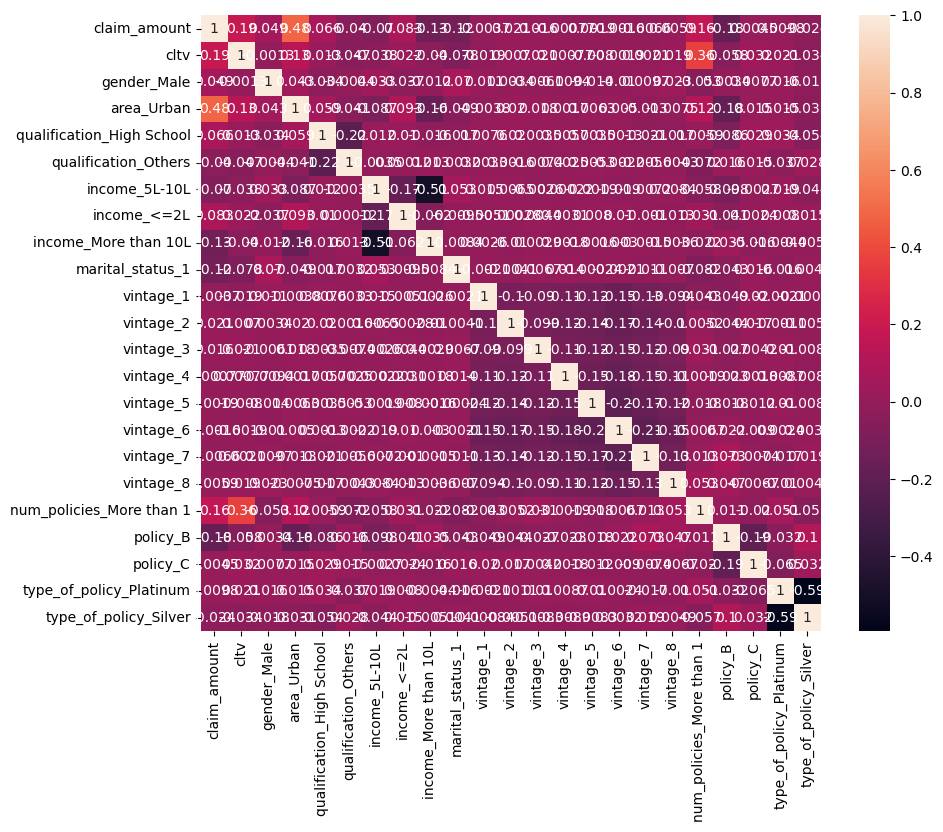

In [67]:
sns.heatmap(finaldata.corr(),annot=True)

In [68]:
#checkpoint

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr=LinearRegression()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [72]:
######################################################

In [73]:
X=finaldata.drop("cltv",axis=1)
y=finaldata.cltv

#With Pipeline and PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
pipe = Pipeline((
("poly",PolynomialFeatures(degree=3)),
("sfm",SelectFromModel(estimator=GradientBoostingRegressor(),max_features=90)),
("lr", LinearRegression()),
))
model_pipe=pipe.fit(Xtrain,ytrain)
print("Training R2")
print(model_pipe.score(Xtrain,ytrain))
print("Testing R2")
print(model_pipe.score(Xtest,ytest))

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [75]:
# lets build a stats model
import statsmodels.api as sma
from statsmodels.api import OLS,add_constant

In [76]:
Xtrain=add_constant(xtrain)
Xtest=add_constant(xtest)

In [77]:
model=OLS(ytrain,Xtrain).fit()

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     512.7
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:43:01   Log-Likelihood:            -7.9811e+05
No. Observations:               62574   AIC:                         1.596e+06
Df Residuals:                   62551   BIC:                         1.596e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.464e+04   2145.911     20.804      0.000    4.04e+04    4.88e+04
claim_amount                  3.1039      0.131     23.676      0.000       2.847       3.361
gender_Male                2500.0683    682.201      3.665      0.000    1162.953    3837.184
area_Urban                 5595.6057    855.292      6.542      0.000    3919.232    7271.980
qualification_High School -1203.2825    691.779     -1.739      0.082   -2559.170     152.605
qualification_Others      -7381.9201   1712.657     -4.310      0.000   -1.07e+04   -4025.109
income_5L-10L             -5138.3174    842.754     -6.097      0.000   -6790.116   -3486.518
income_<=2L               -2647.0906   2419.342     -1.094      0.274   -7389.006    2094.824
income_More than 10L      -7088.8629   1138.520     -6.226      0.000   -9320.365   -4857.361
marital_status_1          -7431.3765    687.546    -10.809      0.000   -8778.968   -6083.785
vintage_1                  1007.0919   1955.049      0.515      0.606   -2824.808    4838.992
vintage_2                  2061.1282   1903.551      1.083      0.279   -1669.835    5792.092
vintage_3                  4986.8139   1983.788      2.514      0.012    1098.585    8875.043
vintage_4                  3343.0418   1868.953      1.789      0.074    -320.109    7006.193
vintage_5                  2576.4874   1827.381      1.410      0.159   -1005.182    6158.157
vintage_6                  2698.9965   1757.681      1.536      0.125    -746.062    6144.055
vintage_7                  2703.0056   1817.663      1.487      0.137    -859.618    6265.629
vintage_8                  3057.4298   1963.857      1.557      0.120    -791.733    6906.592
num_policies_More than 1   6.458e+04    736.151     87.731      0.000    6.31e+04     6.6e+04
policy_B                  -8619.3660    802.056    -10.747      0.000   -1.02e+04   -7047.334
policy_C                   9077.1924   1197.728      7.579      0.000    6729.644    1.14e+04
type_of_policy_Platinum     344.1618    835.975      0.412      0.681   -1294.352    1982.675
type_of_policy_Silver     -2317.5484    989.949     -2.341      0.019   -4257.851    -377.246
==============================================================================
Omnibus:                    35590.429   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           276515.160
Skew:                           2.714   Prob(JB):                         0.00
Kurtosis:                      11.752   Cond. No.                     7.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate 

# Linear Regression Model

In [79]:
model_lr=lr.fit(xtrain,ytrain)

In [80]:
pred=model_lr.predict(xtest)

In [81]:
print("r2 score for linear model is ",r2_score(ytest,pred))
print("r2 score for testdata",model_lr.score(xtest,ytest))
print("model_score ",model_lr.score(xtrain,ytrain))

r2 score for linear model is  0.15285704898102392
r2 score for testdata 0.15285704898102392
model_score  0.15276922586944353


# cat boost

In [82]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
model_cat=cat.fit(xtrain, ytrain)
pred= model_cat.predict(xtest)
print("r2 score for catboost ",r2_score(ytest,pred))
print("r2 score for testdata",model_cat.score(xtest,ytest))
print("model score",model_cat.score(xtrain,ytrain))

Learning rate set to 0.078706
0:	learn: 89919.9995928	total: 149ms	remaining: 2m 29s
1:	learn: 89012.8068122	total: 155ms	remaining: 1m 17s
2:	learn: 88228.5986359	total: 160ms	remaining: 53s
3:	learn: 87544.1232629	total: 165ms	remaining: 41s
4:	learn: 86966.6347457	total: 169ms	remaining: 33.7s
5:	learn: 86459.6940201	total: 174ms	remaining: 28.9s
6:	learn: 86038.7263913	total: 178ms	remaining: 25.3s
7:	learn: 85649.2303388	total: 183ms	remaining: 22.7s
8:	learn: 85330.7409956	total: 188ms	remaining: 20.7s
9:	learn: 85054.1800421	total: 193ms	remaining: 19.1s
10:	learn: 84816.6603711	total: 201ms	remaining: 18s
11:	learn: 84614.1536446	total: 206ms	remaining: 17s
12:	learn: 84445.0818082	total: 212ms	remaining: 16.1s
13:	learn: 84298.3631585	total: 219ms	remaining: 15.4s
14:	learn: 84166.8250423	total: 224ms	remaining: 14.7s
15:	learn: 84069.6886022	total: 227ms	remaining: 14s
16:	learn: 83974.4627891	total: 232ms	remaining: 13.4s
17:	learn: 83891.9494215	total: 237ms	remaining: 12.9

158:	learn: 82682.8316568	total: 997ms	remaining: 5.27s
159:	learn: 82677.8928502	total: 1s	remaining: 5.27s
160:	learn: 82670.9259695	total: 1.01s	remaining: 5.27s
161:	learn: 82665.9484365	total: 1.02s	remaining: 5.26s
162:	learn: 82663.5935740	total: 1.02s	remaining: 5.25s
163:	learn: 82658.3179650	total: 1.03s	remaining: 5.24s
164:	learn: 82653.5019937	total: 1.03s	remaining: 5.23s
165:	learn: 82649.8815960	total: 1.04s	remaining: 5.21s
166:	learn: 82647.6273005	total: 1.04s	remaining: 5.2s
167:	learn: 82643.9057974	total: 1.05s	remaining: 5.19s
168:	learn: 82639.1582028	total: 1.05s	remaining: 5.18s
169:	learn: 82635.1195116	total: 1.06s	remaining: 5.17s
170:	learn: 82632.5223663	total: 1.06s	remaining: 5.15s
171:	learn: 82627.2737571	total: 1.07s	remaining: 5.14s
172:	learn: 82625.0795550	total: 1.07s	remaining: 5.13s
173:	learn: 82618.9051067	total: 1.08s	remaining: 5.12s
174:	learn: 82615.2744132	total: 1.08s	remaining: 5.1s
175:	learn: 82609.9095441	total: 1.09s	remaining: 5.0

338:	learn: 81947.7445181	total: 1.79s	remaining: 3.49s
339:	learn: 81943.0124290	total: 1.8s	remaining: 3.49s
340:	learn: 81940.9438492	total: 1.8s	remaining: 3.48s
341:	learn: 81935.8372021	total: 1.8s	remaining: 3.47s
342:	learn: 81930.6759385	total: 1.81s	remaining: 3.48s
343:	learn: 81927.3529278	total: 1.82s	remaining: 3.47s
344:	learn: 81923.7507934	total: 1.82s	remaining: 3.46s
345:	learn: 81921.2787883	total: 1.83s	remaining: 3.46s
346:	learn: 81917.7816136	total: 1.83s	remaining: 3.45s
347:	learn: 81914.7144915	total: 1.83s	remaining: 3.44s
348:	learn: 81912.4198752	total: 1.84s	remaining: 3.43s
349:	learn: 81907.4652461	total: 1.84s	remaining: 3.42s
350:	learn: 81900.4962674	total: 1.85s	remaining: 3.42s
351:	learn: 81896.4689695	total: 1.85s	remaining: 3.41s
352:	learn: 81893.9960815	total: 1.85s	remaining: 3.4s
353:	learn: 81891.1604452	total: 1.86s	remaining: 3.39s
354:	learn: 81886.8838351	total: 1.86s	remaining: 3.38s
355:	learn: 81883.7637072	total: 1.87s	remaining: 3.

505:	learn: 81399.6986923	total: 2.58s	remaining: 2.52s
506:	learn: 81396.7847599	total: 2.59s	remaining: 2.52s
507:	learn: 81392.9620404	total: 2.59s	remaining: 2.51s
508:	learn: 81389.7141412	total: 2.6s	remaining: 2.5s
509:	learn: 81386.8348390	total: 2.6s	remaining: 2.5s
510:	learn: 81379.9438494	total: 2.61s	remaining: 2.5s
511:	learn: 81377.0929030	total: 2.61s	remaining: 2.49s
512:	learn: 81373.9559592	total: 2.62s	remaining: 2.48s
513:	learn: 81370.8272345	total: 2.62s	remaining: 2.48s
514:	learn: 81366.7104437	total: 2.63s	remaining: 2.48s
515:	learn: 81364.3507815	total: 2.63s	remaining: 2.47s
516:	learn: 81360.9399359	total: 2.64s	remaining: 2.46s
517:	learn: 81356.1065029	total: 2.64s	remaining: 2.46s
518:	learn: 81352.0707845	total: 2.65s	remaining: 2.45s
519:	learn: 81348.5241951	total: 2.65s	remaining: 2.45s
520:	learn: 81345.7217094	total: 2.66s	remaining: 2.44s
521:	learn: 81341.9750736	total: 2.66s	remaining: 2.44s
522:	learn: 81339.5612179	total: 2.67s	remaining: 2.4

680:	learn: 80876.3793582	total: 3.56s	remaining: 1.67s
681:	learn: 80873.0810541	total: 3.57s	remaining: 1.66s
682:	learn: 80870.8629906	total: 3.58s	remaining: 1.66s
683:	learn: 80868.4634038	total: 3.59s	remaining: 1.66s
684:	learn: 80864.5151925	total: 3.59s	remaining: 1.65s
685:	learn: 80861.9078878	total: 3.6s	remaining: 1.65s
686:	learn: 80859.5698933	total: 3.6s	remaining: 1.64s
687:	learn: 80856.2604447	total: 3.61s	remaining: 1.64s
688:	learn: 80854.0306984	total: 3.61s	remaining: 1.63s
689:	learn: 80849.7670872	total: 3.62s	remaining: 1.63s
690:	learn: 80847.4842117	total: 3.63s	remaining: 1.62s
691:	learn: 80844.1580390	total: 3.63s	remaining: 1.62s
692:	learn: 80841.1703957	total: 3.64s	remaining: 1.61s
693:	learn: 80839.5006579	total: 3.64s	remaining: 1.6s
694:	learn: 80837.6634672	total: 3.65s	remaining: 1.6s
695:	learn: 80835.1003096	total: 3.65s	remaining: 1.59s
696:	learn: 80832.9050753	total: 3.66s	remaining: 1.59s
697:	learn: 80828.7460106	total: 3.67s	remaining: 1.

867:	learn: 80381.4286622	total: 4.36s	remaining: 663ms
868:	learn: 80379.2393550	total: 4.37s	remaining: 658ms
869:	learn: 80377.2585184	total: 4.37s	remaining: 653ms
870:	learn: 80375.2839565	total: 4.37s	remaining: 648ms
871:	learn: 80372.3814273	total: 4.38s	remaining: 643ms
872:	learn: 80369.2929540	total: 4.38s	remaining: 638ms
873:	learn: 80366.6517317	total: 4.39s	remaining: 633ms
874:	learn: 80365.1055151	total: 4.39s	remaining: 627ms
875:	learn: 80362.0876182	total: 4.4s	remaining: 622ms
876:	learn: 80360.4840325	total: 4.4s	remaining: 617ms
877:	learn: 80358.0088942	total: 4.4s	remaining: 612ms
878:	learn: 80356.1832458	total: 4.41s	remaining: 607ms
879:	learn: 80353.5709736	total: 4.41s	remaining: 602ms
880:	learn: 80349.4859362	total: 4.42s	remaining: 596ms
881:	learn: 80346.8500764	total: 4.42s	remaining: 591ms
882:	learn: 80345.1463197	total: 4.42s	remaining: 586ms
883:	learn: 80342.3227409	total: 4.43s	remaining: 581ms
884:	learn: 80340.8028930	total: 4.43s	remaining: 5

In [83]:
model_dog = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5)

# Fit the model to the training data
model_catboost=model_dog.fit(xtrain, ytrain)

# Make predictions on the test set
pred = model_catboost.predict(xtest)

print("r2 score for catboost ",r2_score(ytest,pred))
print("r2 score for testdata",model_catboost.score(xtest,ytest))
print("model score",model_catboost.score(xtrain,ytrain))

0:	learn: 89668.9676832	total: 12.5ms	remaining: 1.24s
1:	learn: 88575.4193707	total: 19.6ms	remaining: 962ms
2:	learn: 87664.7391532	total: 25.2ms	remaining: 815ms
3:	learn: 86932.4921880	total: 30.2ms	remaining: 726ms
4:	learn: 86315.8593591	total: 34.6ms	remaining: 657ms
5:	learn: 85803.8756542	total: 39.7ms	remaining: 621ms
6:	learn: 85374.3865664	total: 44.2ms	remaining: 587ms
7:	learn: 85023.2780504	total: 48ms	remaining: 552ms
8:	learn: 84748.0096244	total: 52.5ms	remaining: 531ms
9:	learn: 84531.3776736	total: 57.3ms	remaining: 516ms
10:	learn: 84330.8268128	total: 61.6ms	remaining: 498ms
11:	learn: 84170.8108244	total: 66ms	remaining: 484ms
12:	learn: 84043.3422535	total: 70.1ms	remaining: 469ms
13:	learn: 83937.7012498	total: 75.1ms	remaining: 461ms
14:	learn: 83836.8979885	total: 79ms	remaining: 447ms
15:	learn: 83760.6058558	total: 83.5ms	remaining: 438ms
16:	learn: 83692.5603004	total: 87.3ms	remaining: 426ms
17:	learn: 83634.8982947	total: 91.2ms	remaining: 416ms
18:	lear

# hyper para meter tuning on catboost

In [84]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid for the search
param_grid = {'depth': np.arange(3, 10),
              'learning_rate': np.linspace(0.01, 0.3, 30),
              'iterations': [100, 200, 300, 400],
              'l2_leaf_reg': [1, 2, 3, 4, 5]}
model = CatBoostRegressor()


# Create a RandomizedSearchCV object
rscv = RandomizedSearchCV(model, param_grid, n_iter=20, cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
rscv.fit(xtrain, ytrain)

# Print the best parameters and the best score
print("Best parameters: ", rscv.best_params_)
print("Best score: ", rscv.best_score_)

0:	learn: 90334.1648296	total: 4.52ms	remaining: 1.8s
1:	learn: 89739.0210711	total: 8.09ms	remaining: 1.61s
2:	learn: 89212.3885087	total: 12.1ms	remaining: 1.59s
3:	learn: 88702.9628539	total: 15.7ms	remaining: 1.56s
4:	learn: 88243.5908407	total: 19ms	remaining: 1.5s
5:	learn: 87834.3555132	total: 23.1ms	remaining: 1.52s
6:	learn: 87447.5390133	total: 26.5ms	remaining: 1.49s
7:	learn: 87114.3839717	total: 29.8ms	remaining: 1.46s
8:	learn: 86802.9264897	total: 33.5ms	remaining: 1.45s
9:	learn: 86511.3591164	total: 36.7ms	remaining: 1.43s
10:	learn: 86254.6704078	total: 40.1ms	remaining: 1.42s
11:	learn: 86011.4028219	total: 43.7ms	remaining: 1.41s
12:	learn: 85803.9846840	total: 46.7ms	remaining: 1.39s
13:	learn: 85604.3030496	total: 50ms	remaining: 1.38s
14:	learn: 85423.5912852	total: 53.3ms	remaining: 1.37s
15:	learn: 85258.2017765	total: 56.9ms	remaining: 1.36s
16:	learn: 85103.7120900	total: 60ms	remaining: 1.35s
17:	learn: 84969.3587745	total: 63.6ms	remaining: 1.35s
18:	learn:

164:	learn: 83319.3172779	total: 588ms	remaining: 837ms
165:	learn: 83317.7314838	total: 592ms	remaining: 834ms
166:	learn: 83316.7753864	total: 595ms	remaining: 831ms
167:	learn: 83316.0258460	total: 599ms	remaining: 827ms
168:	learn: 83315.1438773	total: 602ms	remaining: 823ms
169:	learn: 83314.0366826	total: 606ms	remaining: 820ms
170:	learn: 83313.3815910	total: 610ms	remaining: 817ms
171:	learn: 83312.8232911	total: 613ms	remaining: 813ms
172:	learn: 83312.2209803	total: 617ms	remaining: 810ms
173:	learn: 83311.4416391	total: 621ms	remaining: 807ms
174:	learn: 83310.4600216	total: 624ms	remaining: 803ms
175:	learn: 83309.7974574	total: 628ms	remaining: 799ms
176:	learn: 83309.4159457	total: 631ms	remaining: 796ms
177:	learn: 83308.4826161	total: 635ms	remaining: 793ms
178:	learn: 83307.7426322	total: 639ms	remaining: 789ms
179:	learn: 83307.1743564	total: 642ms	remaining: 785ms
180:	learn: 83306.6960497	total: 646ms	remaining: 782ms
181:	learn: 83305.7141663	total: 650ms	remaining

337:	learn: 83188.9144270	total: 1.18s	remaining: 216ms
338:	learn: 83188.2950048	total: 1.18s	remaining: 213ms
339:	learn: 83187.9845234	total: 1.18s	remaining: 209ms
340:	learn: 83187.4005412	total: 1.19s	remaining: 206ms
341:	learn: 83186.6720538	total: 1.19s	remaining: 202ms
342:	learn: 83186.2224322	total: 1.2s	remaining: 199ms
343:	learn: 83185.6823825	total: 1.2s	remaining: 195ms
344:	learn: 83185.0754210	total: 1.2s	remaining: 191ms
345:	learn: 83184.2048040	total: 1.2s	remaining: 188ms
346:	learn: 83183.6419706	total: 1.21s	remaining: 184ms
347:	learn: 83182.9643459	total: 1.21s	remaining: 181ms
348:	learn: 83182.1026221	total: 1.21s	remaining: 177ms
349:	learn: 83180.8416372	total: 1.22s	remaining: 174ms
350:	learn: 83180.2336692	total: 1.22s	remaining: 170ms
351:	learn: 83179.4516385	total: 1.22s	remaining: 167ms
352:	learn: 83178.9047975	total: 1.23s	remaining: 163ms
353:	learn: 83178.2644051	total: 1.23s	remaining: 160ms
354:	learn: 83177.9012182	total: 1.23s	remaining: 15

In [86]:
from sklearn.model_selection import GridSearchCV


model = CatBoostRegressor()

# Define the parameter grid for the search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'learning_rate': [0.01, 0.05, 0.1],
              'iterations': [100, 200, 300],
              'l2_leaf_reg': [1, 2, 3]}

# Create a GridSearchCV object
gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
gscv.fit(xtrain, ytrain)

# Print the best parameters and the best score
print("Best parameters: ", gscv.best_params_)
print("Best score: ", gscv.best_score_)

0:	learn: 90303.1116932	total: 6.27ms	remaining: 620ms
1:	learn: 89684.5125600	total: 12.8ms	remaining: 625ms
2:	learn: 89119.7903169	total: 18.8ms	remaining: 609ms
3:	learn: 88598.5991993	total: 25ms	remaining: 601ms
4:	learn: 88129.9385007	total: 31ms	remaining: 589ms
5:	learn: 87704.0469928	total: 37.5ms	remaining: 588ms
6:	learn: 87321.5952331	total: 42.2ms	remaining: 561ms
7:	learn: 86953.0733756	total: 47.9ms	remaining: 551ms
8:	learn: 86630.6378377	total: 53.6ms	remaining: 542ms
9:	learn: 86332.4628761	total: 59.5ms	remaining: 536ms
10:	learn: 86063.9697161	total: 65.1ms	remaining: 526ms
11:	learn: 85819.7328785	total: 70.9ms	remaining: 520ms
12:	learn: 85594.9093871	total: 77ms	remaining: 515ms
13:	learn: 85400.4697654	total: 83.2ms	remaining: 511ms
14:	learn: 85224.2778343	total: 87.9ms	remaining: 498ms
15:	learn: 85062.5148903	total: 93.9ms	remaining: 493ms
16:	learn: 84907.2509080	total: 99.6ms	remaining: 486ms
17:	learn: 84766.3751820	total: 107ms	remaining: 485ms
18:	learn

In [90]:
model_dog = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=8,l2_leaf_reg=1)

# Fit the model to the training data
model_catboost=model_dog.fit(xtrain, ytrain)

# Make predictions on the test set
pred = model_catboost.predict(xtest)

print("r2 score for catboost ",r2_score(ytest,pred))
print("r2 score for testdata",model_catboost.score(xtest,ytest))
print("model score",model_catboost.score(xtrain,ytrain))

0:	learn: 90297.7205922	total: 13ms	remaining: 1.28s
1:	learn: 89666.9130358	total: 22.8ms	remaining: 1.12s
2:	learn: 89091.5527427	total: 31.4ms	remaining: 1.01s
3:	learn: 88563.8719821	total: 38.3ms	remaining: 919ms
4:	learn: 88082.0047752	total: 45.2ms	remaining: 858ms
5:	learn: 87638.9517403	total: 51.7ms	remaining: 811ms
6:	learn: 87244.4043584	total: 58.8ms	remaining: 781ms
7:	learn: 86896.5905150	total: 62.9ms	remaining: 723ms
8:	learn: 86592.2907163	total: 66.7ms	remaining: 674ms
9:	learn: 86286.4333777	total: 74.1ms	remaining: 667ms
10:	learn: 86013.6284062	total: 80.5ms	remaining: 651ms
11:	learn: 85781.2279183	total: 84.7ms	remaining: 621ms
12:	learn: 85556.8755045	total: 91.1ms	remaining: 610ms
13:	learn: 85349.5829291	total: 97.4ms	remaining: 598ms
14:	learn: 85168.4973359	total: 104ms	remaining: 590ms
15:	learn: 84991.1394645	total: 111ms	remaining: 583ms
16:	learn: 84827.7263521	total: 118ms	remaining: 575ms
17:	learn: 84705.9467199	total: 121ms	remaining: 552ms
18:	lear

In [208]:
#pip install optuna

# non parametric models 

# Gredient boosting

In [148]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [175]:
gbr=GradientBoostingRegressor(n_estimators=200)
model_gbr=gbr.fit(xtrain,ytrain)
pred=model_gbr.predict(xtest)
print("r2 score for GBR is ",r2_score(ytest,pred))
print("RMSE is ",np.sqrt(mean_squared_error(ytest,pred)))
print("r2 score for testdata",model_gbr.score(xtest,ytest))
print("model score", model_gbr.score(xtrain,ytrain))

r2 score for GBR is  0.15790729045628948
RMSE is  82320.38948959245
r2 score for testdata 0.15790729045628948
model score 0.17615777781206565


# hyper parameter tuning on GBM

In [171]:
gbr=GradientBoostingRegressor(n_estimators=80,random_state=10)
model_gbr=gbr.fit(xtrain,ytrain)
pred=model_gbr.predict(xtest)
print("r2 score for GBR is ",r2_score(ytest,pred))
print("RMSE is ",np.sqrt(mean_squared_error(ytest,pred)))
print("r2 score for testdata",model_gbr.score(xtest,ytest))
print("model score", model_gbr.score(xtrain,ytrain))

r2 score for GBR is  0.15988589178814094
RMSE is  82223.62162826004
r2 score for testdata 0.15988589178814094
model score 0.16528198609745803


# LGboostM

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'l2',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
model_lgbb = lgb.train(params, train_data, num_boost_round=20)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.6f}".format(rmse))


In [214]:
#pip install lightgbm

In [167]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()

model_lgb=lgb_model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)], early_stopping_rounds=5)

pred = model_lgb.predict(xtest)
print("r2 for lgbm is ",r2_score(ytest,pred))
print("r2 score for testdata",model_lgb.score(xtest,ytest))
print("model score at trainset ",model_lgb.score(xtrain,ytrain))

[1]	valid_0's l2: 7.80346e+09
[2]	valid_0's l2: 7.60494e+09
[3]	valid_0's l2: 7.44405e+09
[4]	valid_0's l2: 7.31472e+09
[5]	valid_0's l2: 7.21004e+09
[6]	valid_0's l2: 7.12516e+09
[7]	valid_0's l2: 7.05632e+09
[8]	valid_0's l2: 7.00135e+09
[9]	valid_0's l2: 6.9566e+09
[10]	valid_0's l2: 6.92099e+09
[11]	valid_0's l2: 6.89112e+09
[12]	valid_0's l2: 6.86761e+09
[13]	valid_0's l2: 6.84884e+09
[14]	valid_0's l2: 6.83253e+09
[15]	valid_0's l2: 6.81989e+09
[16]	valid_0's l2: 6.81e+09
[17]	valid_0's l2: 6.80339e+09
[18]	valid_0's l2: 6.79585e+09
[19]	valid_0's l2: 6.78836e+09
[20]	valid_0's l2: 6.78356e+09
[21]	valid_0's l2: 6.78047e+09
[22]	valid_0's l2: 6.77762e+09
[23]	valid_0's l2: 6.77471e+09
[24]	valid_0's l2: 6.77172e+09
[25]	valid_0's l2: 6.76974e+09
[26]	valid_0's l2: 6.76808e+09
[27]	valid_0's l2: 6.76652e+09
[28]	valid_0's l2: 6.7653e+09
[29]	valid_0's l2: 6.76524e+09
[30]	valid_0's l2: 6.76499e+09
[31]	valid_0's l2: 6.76578e+09
[32]	valid_0's l2: 6.76548e+09
[33]	valid_0's l2: 6.7

 # randomsearchcv

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

model_lgb_CV = lgb.LGBMRegressor()

# define the parameter grid
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': np.linspace(10, 150, 10, dtype=int),
    'learning_rate': np.linspace(0.001, 0.1, 10),
    'n_estimators': np.linspace(50, 1000, 10, dtype=int),
    'subsample_for_bin': np.linspace(20000, 800000, 10, dtype=int),
    'min_child_samples': np.linspace(20, 500, 10, dtype=int),
    'reg_alpha': np.linspace(0, 1, 10),
    'reg_lambda': np.linspace(0, 1, 10)
}

# create the randomized search object
random_search = RandomizedSearchCV(model_lgb_CV, param_grid, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# fit the randomized search
random_search.fit(xtrain, ytrain)

# print the best hyperparameters
print(random_search.best_params_)

# print the best score
print(random_search.best_score_)


# OPTUNA

In [218]:
import optuna
import lightgbm as lgb

def optimize_lgb_regressor(trial):
    params = {
        "objective": "regression",
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 2, 64),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }
    
    model = lgb.LGBMRegressor(**params)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    return r2_score(ytest,pred)

study = optuna.create_study(direction="minimize")
study.optimize(optimize_lgb_regressor, n_trials=100)

best_params = study.best_params
print("Best params: ", best_params)

[I 2023-01-22 19:46:22,912] A new study created in memory with name: no-name-d84803d2-0bba-42d8-8d52-2a88b4a7b784


[LightGBM] [Warning] feature_fraction is set=0.9109665159023655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9109665159023655
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_fraction is set=0.6489748973267907, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6489748973267907
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:46:24,131] Trial 0 finished with value: 0.1408310716421174 and parameters: {'num_leaves': 58, 'learning_rate': 0.011630977703918003, 'feature_fraction': 0.9109665159023655, 'bagging_fraction': 0.6489748973267907, 'bagging_freq': 10, 'min_data_in_leaf': 79}. Best is trial 0 with value: 0.1408310716421174.


[LightGBM] [Warning] feature_fraction is set=0.9651234206888967, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9651234206888967
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] bagging_fraction is set=0.7689586247778726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7689586247778726
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-01-22 19:46:25,269] Trial 1 finished with value: 0.13727516278303498 and parameters: {'num_leaves': 60, 'learning_rate': 0.16439940555462887, 'feature_fraction': 0.9651234206888967, 'bagging_fraction': 0.7689586247778726, 'bagging_freq': 1, 'min_data_in_leaf': 27}. Best is trial 1 with value: 0.13727516278303498.


[LightGBM] [Warning] feature_fraction is set=0.70682540867729, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.70682540867729
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_fraction is set=0.682082730807614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.682082730807614
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:46:26,561] Trial 2 finished with value: 0.1450052996995821 and parameters: {'num_leaves': 63, 'learning_rate': 0.13703539968234324, 'feature_fraction': 0.70682540867729, 'bagging_fraction': 0.682082730807614, 'bagging_freq': 7, 'min_data_in_leaf': 98}. Best is trial 1 with value: 0.13727516278303498.


[LightGBM] [Warning] feature_fraction is set=0.5065991415581532, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5065991415581532
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] bagging_fraction is set=0.5729121334744006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5729121334744006
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-01-22 19:46:27,163] Trial 3 finished with value: 0.14358495809821192 and parameters: {'num_leaves': 15, 'learning_rate': 0.022602802823504384, 'feature_fraction': 0.5065991415581532, 'bagging_fraction': 0.5729121334744006, 'bagging_freq': 3, 'min_data_in_leaf': 39}. Best is trial 1 with value: 0.13727516278303498.


[LightGBM] [Warning] feature_fraction is set=0.45281628807264374, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45281628807264374
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_fraction is set=0.5273398045421045, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5273398045421045
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:46:27,768] Trial 4 finished with value: 0.13915477179143376 and parameters: {'num_leaves': 18, 'learning_rate': 0.022313849289851487, 'feature_fraction': 0.45281628807264374, 'bagging_fraction': 0.5273398045421045, 'bagging_freq': 5, 'min_data_in_leaf': 42}. Best is trial 1 with value: 0.13727516278303498.


[LightGBM] [Warning] feature_fraction is set=0.751804261650802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.751804261650802
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] bagging_fraction is set=0.7488156328835696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7488156328835696
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:46:29,060] Trial 5 finished with value: 0.14821381307203496 and parameters: {'num_leaves': 59, 'learning_rate': 0.016559887544545144, 'feature_fraction': 0.751804261650802, 'bagging_fraction': 0.7488156328835696, 'bagging_freq': 5, 'min_data_in_leaf': 53}. Best is trial 1 with value: 0.13727516278303498.


[LightGBM] [Warning] feature_fraction is set=0.8308467708838196, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8308467708838196
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] bagging_fraction is set=0.5660081122580833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5660081122580833
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-01-22 19:46:30,029] Trial 6 finished with value: 0.15755955715164993 and parameters: {'num_leaves': 42, 'learning_rate': 0.03769764288122818, 'feature_fraction': 0.8308467708838196, 'bagging_fraction': 0.5660081122580833, 'bagging_freq': 1, 'min_data_in_leaf': 66}. Best is trial 1 with value: 0.13727516278303498.


[LightGBM] [Warning] feature_fraction is set=0.5799512920262933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5799512920262933
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_fraction is set=0.9422643387918599, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9422643387918599
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:46:31,000] Trial 7 finished with value: 0.15731072144088598 and parameters: {'num_leaves': 37, 'learning_rate': 0.06625575615107152, 'feature_fraction': 0.5799512920262933, 'bagging_fraction': 0.9422643387918599, 'bagging_freq': 7, 'min_data_in_leaf': 70}. Best is trial 1 with value: 0.13727516278303498.


[LightGBM] [Warning] feature_fraction is set=0.6525854598108272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6525854598108272
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_fraction is set=0.5263071512719516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5263071512719516
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-01-22 19:46:32,049] Trial 8 finished with value: 0.11776531280995584 and parameters: {'num_leaves': 41, 'learning_rate': 0.010651312058686373, 'feature_fraction': 0.6525854598108272, 'bagging_fraction': 0.5263071512719516, 'bagging_freq': 2, 'min_data_in_leaf': 92}. Best is trial 8 with value: 0.11776531280995584.


[LightGBM] [Warning] feature_fraction is set=0.45284784760609853, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45284784760609853
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_fraction is set=0.7788428387465183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7788428387465183
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:46:33,037] Trial 9 finished with value: 0.10476481801648685 and parameters: {'num_leaves': 31, 'learning_rate': 0.011342118803721992, 'feature_fraction': 0.45284784760609853, 'bagging_fraction': 0.7788428387465183, 'bagging_freq': 4, 'min_data_in_leaf': 58}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.42318310863554204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42318310863554204
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.4112350221435447, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4112350221435447
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:46:33,336] Trial 10 finished with value: 0.14908400093865481 and parameters: {'num_leaves': 3, 'learning_rate': 0.039685532642263946, 'feature_fraction': 0.42318310863554204, 'bagging_fraction': 0.4112350221435447, 'bagging_freq': 10, 'min_data_in_leaf': 1}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.5608871020954714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5608871020954714
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_fraction is set=0.8084522282305221, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8084522282305221
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-01-22 19:46:34,237] Trial 11 finished with value: 0.10950233668938092 and parameters: {'num_leaves': 27, 'learning_rate': 0.010217994781531925, 'feature_fraction': 0.5608871020954714, 'bagging_fraction': 0.8084522282305221, 'bagging_freq': 3, 'min_data_in_leaf': 98}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.5525551285420158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5525551285420158
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_fraction is set=0.8400466998620162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8400466998620162
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:46:35,146] Trial 12 finished with value: 0.11248527159134958 and parameters: {'num_leaves': 27, 'learning_rate': 0.010779276216214915, 'feature_fraction': 0.5525551285420158, 'bagging_fraction': 0.8400466998620162, 'bagging_freq': 4, 'min_data_in_leaf': 15}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.4229741370750647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4229741370750647
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] bagging_fraction is set=0.8611442502455812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8611442502455812
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-01-22 19:46:36,111] Trial 13 finished with value: 0.12598868138041264 and parameters: {'num_leaves': 26, 'learning_rate': 0.01893321909378459, 'feature_fraction': 0.4229741370750647, 'bagging_fraction': 0.8611442502455812, 'bagging_freq': 3, 'min_data_in_leaf': 81}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.5994512924098137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5994512924098137
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_fraction is set=0.9769294264456616, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9769294264456616
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:46:37,410] Trial 14 finished with value: 0.11168559595009009 and parameters: {'num_leaves': 49, 'learning_rate': 0.010179617852270593, 'feature_fraction': 0.5994512924098137, 'bagging_fraction': 0.9769294264456616, 'bagging_freq': 6, 'min_data_in_leaf': 59}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.500826209627647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.500826209627647
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_fraction is set=0.8366911850908202, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8366911850908202
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-01-22 19:46:38,376] Trial 15 finished with value: 0.12649712077550235 and parameters: {'num_leaves': 29, 'learning_rate': 0.015304354167590475, 'feature_fraction': 0.500826209627647, 'bagging_fraction': 0.8366911850908202, 'bagging_freq': 3, 'min_data_in_leaf': 87}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.4002695849125103, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4002695849125103
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_fraction is set=0.7593648258763287, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7593648258763287
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:46:38,989] Trial 16 finished with value: 0.1164343404598478 and parameters: {'num_leaves': 13, 'learning_rate': 0.015905318286484116, 'feature_fraction': 0.4002695849125103, 'bagging_fraction': 0.7593648258763287, 'bagging_freq': 4, 'min_data_in_leaf': 41}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.5081670285635759, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5081670285635759
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_fraction is set=0.9089068590519025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9089068590519025
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:46:39,807] Trial 17 finished with value: 0.15238242349922015 and parameters: {'num_leaves': 22, 'learning_rate': 0.031339446322938905, 'feature_fraction': 0.5081670285635759, 'bagging_fraction': 0.9089068590519025, 'bagging_freq': 7, 'min_data_in_leaf': 72}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.631269310956371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.631269310956371
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.798467144267458, subsample=1.0 will be ignored. Current value: bagging_fraction=0.798467144267458
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:46:40,775] Trial 18 finished with value: 0.15401261587744197 and parameters: {'num_leaves': 33, 'learning_rate': 0.027236858607392268, 'feature_fraction': 0.631269310956371, 'bagging_fraction': 0.798467144267458, 'bagging_freq': 4, 'min_data_in_leaf': 100}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.5494985014928991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5494985014928991
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] bagging_fraction is set=0.8943760967647182, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8943760967647182
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-01-22 19:46:41,151] Trial 19 finished with value: 0.12554527195304255 and parameters: {'num_leaves': 3, 'learning_rate': 0.014993886803795247, 'feature_fraction': 0.5494985014928991, 'bagging_fraction': 0.8943760967647182, 'bagging_freq': 2, 'min_data_in_leaf': 27}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.4830707080747651, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4830707080747651
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_fraction is set=0.7071608264002034, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7071608264002034
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2023-01-22 19:46:42,328] Trial 20 finished with value: 0.11799759702870838 and parameters: {'num_leaves': 47, 'learning_rate': 0.013057614755321644, 'feature_fraction': 0.4830707080747651, 'bagging_fraction': 0.7071608264002034, 'bagging_freq': 8, 'min_data_in_leaf': 59}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.60165316905504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60165316905504
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_fraction is set=0.9869614397446473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9869614397446473
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:46:43,644] Trial 21 finished with value: 0.11080171641260772 and parameters: {'num_leaves': 51, 'learning_rate': 0.010007527627922274, 'feature_fraction': 0.60165316905504, 'bagging_fraction': 0.9869614397446473, 'bagging_freq': 6, 'min_data_in_leaf': 59}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.5523423355759252, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5523423355759252
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_fraction is set=0.979558540128743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.979558540128743
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:46:44,925] Trial 22 finished with value: 0.12367566172867817 and parameters: {'num_leaves': 51, 'learning_rate': 0.013149420166515477, 'feature_fraction': 0.5523423355759252, 'bagging_fraction': 0.979558540128743, 'bagging_freq': 6, 'min_data_in_leaf': 50}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.6385848811111082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6385848811111082
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] bagging_fraction is set=0.8942957233057344, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8942957233057344
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:46:45,838] Trial 23 finished with value: 0.1450944627687627 and parameters: {'num_leaves': 33, 'learning_rate': 0.019218454161692336, 'feature_fraction': 0.6385848811111082, 'bagging_fraction': 0.8942957233057344, 'bagging_freq': 5, 'min_data_in_leaf': 78}. Best is trial 9 with value: 0.10476481801648685.


[LightGBM] [Warning] feature_fraction is set=0.462364207044297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.462364207044297
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_fraction is set=0.9904386430288094, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9904386430288094
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2023-01-22 19:46:46,948] Trial 24 finished with value: 0.10054858239300557 and parameters: {'num_leaves': 38, 'learning_rate': 0.010509920182859425, 'feature_fraction': 0.462364207044297, 'bagging_fraction': 0.9904386430288094, 'bagging_freq': 8, 'min_data_in_leaf': 65}. Best is trial 24 with value: 0.10054858239300557.


[LightGBM] [Warning] feature_fraction is set=0.4657543777547385, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4657543777547385
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] bagging_fraction is set=0.8200099374046446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8200099374046446
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2023-01-22 19:46:48,118] Trial 25 finished with value: 0.12448505008116362 and parameters: {'num_leaves': 38, 'learning_rate': 0.0162612336283105, 'feature_fraction': 0.4657543777547385, 'bagging_fraction': 0.8200099374046446, 'bagging_freq': 9, 'min_data_in_leaf': 89}. Best is trial 24 with value: 0.10054858239300557.


[LightGBM] [Warning] feature_fraction is set=0.45461638249739933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45461638249739933
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_fraction is set=0.9067113563852991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9067113563852991
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2023-01-22 19:46:48,979] Trial 26 finished with value: 0.11117764993444923 and parameters: {'num_leaves': 21, 'learning_rate': 0.012727529748251146, 'feature_fraction': 0.45461638249739933, 'bagging_fraction': 0.9067113563852991, 'bagging_freq': 8, 'min_data_in_leaf': 49}. Best is trial 24 with value: 0.10054858239300557.


[LightGBM] [Warning] feature_fraction is set=0.5331034572153625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5331034572153625
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_fraction is set=0.7988574503580388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7988574503580388
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-01-22 19:46:50,022] Trial 27 finished with value: 0.1227590967329234 and parameters: {'num_leaves': 11, 'learning_rate': 0.01314254501068384, 'feature_fraction': 0.5331034572153625, 'bagging_fraction': 0.7988574503580388, 'bagging_freq': 2, 'min_data_in_leaf': 33}. Best is trial 24 with value: 0.10054858239300557.


[LightGBM] [Warning] feature_fraction is set=0.46177211863974305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46177211863974305
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] bagging_fraction is set=0.8619127014424298, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8619127014424298
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:46:52,185] Trial 28 finished with value: 0.09796651904773246 and parameters: {'num_leaves': 32, 'learning_rate': 0.010080506420776323, 'feature_fraction': 0.46177211863974305, 'bagging_fraction': 0.8619127014424298, 'bagging_freq': 4, 'min_data_in_leaf': 66}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.4096283213775467, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4096283213775467
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_fraction is set=0.8610610717165778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8610610717165778
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:46:53,666] Trial 29 finished with value: 0.105986375614738 and parameters: {'num_leaves': 33, 'learning_rate': 0.013124904946019181, 'feature_fraction': 0.4096283213775467, 'bagging_fraction': 0.8610610717165778, 'bagging_freq': 10, 'min_data_in_leaf': 65}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.46350908493461757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46350908493461757
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_fraction is set=0.9463674825994264, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9463674825994264
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2023-01-22 19:46:55,566] Trial 30 finished with value: 0.13634491253924697 and parameters: {'num_leaves': 44, 'learning_rate': 0.02082355463700079, 'feature_fraction': 0.46350908493461757, 'bagging_fraction': 0.9463674825994264, 'bagging_freq': 8, 'min_data_in_leaf': 79}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.40248456007043365, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40248456007043365
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_fraction is set=0.8725952669022908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8725952669022908
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:46:57,245] Trial 31 finished with value: 0.10362838976753841 and parameters: {'num_leaves': 33, 'learning_rate': 0.012597022981658884, 'feature_fraction': 0.40248456007043365, 'bagging_fraction': 0.8725952669022908, 'bagging_freq': 10, 'min_data_in_leaf': 65}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.44313690317927146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44313690317927146
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_fraction is set=0.9351728960664677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9351728960664677
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2023-01-22 19:46:59,467] Trial 32 finished with value: 0.1077968155761112 and parameters: {'num_leaves': 37, 'learning_rate': 0.011943697272357324, 'feature_fraction': 0.44313690317927146, 'bagging_fraction': 0.9351728960664677, 'bagging_freq': 9, 'min_data_in_leaf': 74}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.497370775114732, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.497370775114732
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] bagging_fraction is set=0.8670640843797122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8670640843797122
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2023-01-22 19:47:01,108] Trial 33 finished with value: 0.1117514658403671 and parameters: {'num_leaves': 31, 'learning_rate': 0.011667748883287178, 'feature_fraction': 0.497370775114732, 'bagging_fraction': 0.8670640843797122, 'bagging_freq': 9, 'min_data_in_leaf': 66}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.42952914802337366, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42952914802337366
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_fraction is set=0.999073593592048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.999073593592048
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:47:02,829] Trial 34 finished with value: 0.12286742278341167 and parameters: {'num_leaves': 23, 'learning_rate': 0.01782650579329323, 'feature_fraction': 0.42952914802337366, 'bagging_fraction': 0.999073593592048, 'bagging_freq': 10, 'min_data_in_leaf': 54}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.4788057017457299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4788057017457299
[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] bagging_fraction is set=0.7775926633183871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7775926633183871
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:47:04,528] Trial 35 finished with value: 0.126314413774252 and parameters: {'num_leaves': 38, 'learning_rate': 0.015280444099885344, 'feature_fraction': 0.4788057017457299, 'bagging_fraction': 0.7775926633183871, 'bagging_freq': 4, 'min_data_in_leaf': 63}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.4431763439000195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4431763439000195
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_fraction is set=0.7250854122816008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7250854122816008
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:06,902] Trial 36 finished with value: 0.14104668670693987 and parameters: {'num_leaves': 55, 'learning_rate': 0.0235572213185301, 'feature_fraction': 0.4431763439000195, 'bagging_fraction': 0.7250854122816008, 'bagging_freq': 5, 'min_data_in_leaf': 45}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.40420257573065826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40420257573065826
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] bagging_fraction is set=0.7752936029615702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7752936029615702
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2023-01-22 19:47:08,591] Trial 37 finished with value: 0.10888976102170012 and parameters: {'num_leaves': 44, 'learning_rate': 0.013820259158175014, 'feature_fraction': 0.40420257573065826, 'bagging_fraction': 0.7752936029615702, 'bagging_freq': 9, 'min_data_in_leaf': 57}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.5231695319017202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5231695319017202
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_fraction is set=0.8648723888813595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8648723888813595
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:47:10,206] Trial 38 finished with value: 0.1159862759452408 and parameters: {'num_leaves': 35, 'learning_rate': 0.011408596954355837, 'feature_fraction': 0.5231695319017202, 'bagging_fraction': 0.8648723888813595, 'bagging_freq': 7, 'min_data_in_leaf': 69}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.4802744201923281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4802744201923281
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_fraction is set=0.9479758799418103, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9479758799418103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:47:11,582] Trial 39 finished with value: 0.13063570487674947 and parameters: {'num_leaves': 19, 'learning_rate': 0.016711674716639265, 'feature_fraction': 0.4802744201923281, 'bagging_fraction': 0.9479758799418103, 'bagging_freq': 4, 'min_data_in_leaf': 47}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.5140968911304791, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5140968911304791
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_fraction is set=0.7332513518307086, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7332513518307086
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:47:13,203] Trial 40 finished with value: 0.13952045327067863 and parameters: {'num_leaves': 40, 'learning_rate': 0.020401742143251085, 'feature_fraction': 0.5140968911304791, 'bagging_fraction': 0.7332513518307086, 'bagging_freq': 10, 'min_data_in_leaf': 75}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.400138258507884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.400138258507884
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] bagging_fraction is set=0.8383304015590424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8383304015590424
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:47:14,690] Trial 41 finished with value: 0.10363059750450876 and parameters: {'num_leaves': 32, 'learning_rate': 0.012609569045804497, 'feature_fraction': 0.400138258507884, 'bagging_fraction': 0.8383304015590424, 'bagging_freq': 10, 'min_data_in_leaf': 66}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.44166752555982486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44166752555982486
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] bagging_fraction is set=0.8270981411088179, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8270981411088179
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2023-01-22 19:47:16,413] Trial 42 finished with value: 0.10737658660864646 and parameters: {'num_leaves': 29, 'learning_rate': 0.011904837364097533, 'feature_fraction': 0.44166752555982486, 'bagging_fraction': 0.8270981411088179, 'bagging_freq': 9, 'min_data_in_leaf': 64}. Best is trial 28 with value: 0.09796651904773246.


[LightGBM] [Warning] feature_fraction is set=0.40116850611486793, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40116850611486793
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] bagging_fraction is set=0.7679697636618538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7679697636618538
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:47:17,678] Trial 43 finished with value: 0.090466539355468 and parameters: {'num_leaves': 24, 'learning_rate': 0.010006874660214255, 'feature_fraction': 0.40116850611486793, 'bagging_fraction': 0.7679697636618538, 'bagging_freq': 10, 'min_data_in_leaf': 83}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4006657584779853, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4006657584779853
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] bagging_fraction is set=0.7491373933768496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7491373933768496
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:47:19,075] Trial 44 finished with value: 0.11020011333182411 and parameters: {'num_leaves': 17, 'learning_rate': 0.014173497366597771, 'feature_fraction': 0.4006657584779853, 'bagging_fraction': 0.7491373933768496, 'bagging_freq': 10, 'min_data_in_leaf': 82}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4284725463546176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4284725463546176
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_fraction is set=0.6756946219351683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6756946219351683
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-01-22 19:47:20,704] Trial 45 finished with value: 0.09735657468736159 and parameters: {'num_leaves': 26, 'learning_rate': 0.011317037753146904, 'feature_fraction': 0.4284725463546176, 'bagging_fraction': 0.6756946219351683, 'bagging_freq': 10, 'min_data_in_leaf': 84}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.43260321944381414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43260321944381414
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_fraction is set=0.6722412010894865, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6722412010894865
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2023-01-22 19:47:21,936] Trial 46 finished with value: 0.10144599542768051 and parameters: {'num_leaves': 24, 'learning_rate': 0.010732148806655564, 'feature_fraction': 0.43260321944381414, 'bagging_fraction': 0.6722412010894865, 'bagging_freq': 8, 'min_data_in_leaf': 94}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.43167341072051985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43167341072051985
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_fraction is set=0.6663574373718147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6663574373718147
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2023-01-22 19:47:23,475] Trial 47 finished with value: 0.09167033902903732 and parameters: {'num_leaves': 26, 'learning_rate': 0.010222100404620566, 'feature_fraction': 0.43167341072051985, 'bagging_fraction': 0.6663574373718147, 'bagging_freq': 8, 'min_data_in_leaf': 93}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4815134706523499, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4815134706523499
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_fraction is set=0.6512183124104808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6512183124104808
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2023-01-22 19:47:24,468] Trial 48 finished with value: 0.1038758871380484 and parameters: {'num_leaves': 10, 'learning_rate': 0.010342775914122249, 'feature_fraction': 0.4815134706523499, 'bagging_fraction': 0.6512183124104808, 'bagging_freq': 8, 'min_data_in_leaf': 86}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4640380795362727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4640380795362727
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_fraction is set=0.6925038178814878, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6925038178814878
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:47:25,786] Trial 49 finished with value: 0.1294530122488915 and parameters: {'num_leaves': 25, 'learning_rate': 0.017902964790987796, 'feature_fraction': 0.4640380795362727, 'bagging_fraction': 0.6925038178814878, 'bagging_freq': 7, 'min_data_in_leaf': 94}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.530390698112049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.530390698112049
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_fraction is set=0.596827052541636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.596827052541636
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2023-01-22 19:47:27,152] Trial 50 finished with value: 0.10924524709638828 and parameters: {'num_leaves': 29, 'learning_rate': 0.010212243175746835, 'feature_fraction': 0.530390698112049, 'bagging_fraction': 0.596827052541636, 'bagging_freq': 9, 'min_data_in_leaf': 84}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4282002846346574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4282002846346574
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_fraction is set=0.6603782505424441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6603782505424441
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:47:28,639] Trial 51 finished with value: 0.09056941592616741 and parameters: {'num_leaves': 24, 'learning_rate': 0.010003509347347572, 'feature_fraction': 0.4282002846346574, 'bagging_fraction': 0.6603782505424441, 'bagging_freq': 7, 'min_data_in_leaf': 92}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.43169134742136517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43169134742136517
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.6299334407570257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6299334407570257
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:47:30,261] Trial 52 finished with value: 0.09725329001336769 and parameters: {'num_leaves': 27, 'learning_rate': 0.011255600119359761, 'feature_fraction': 0.43169134742136517, 'bagging_fraction': 0.6299334407570257, 'bagging_freq': 7, 'min_data_in_leaf': 90}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4399212309243624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4399212309243624
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.6232440563432403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6232440563432403
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:47:31,382] Trial 53 finished with value: 0.11813321656675291 and parameters: {'num_leaves': 20, 'learning_rate': 0.014374354569008216, 'feature_fraction': 0.4399212309243624, 'bagging_fraction': 0.6232440563432403, 'bagging_freq': 6, 'min_data_in_leaf': 90}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.43020423473740854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43020423473740854
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_fraction is set=0.6735487693075659, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6735487693075659
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:47:32,431] Trial 54 finished with value: 0.09866884506478368 and parameters: {'num_leaves': 16, 'learning_rate': 0.011568558911425027, 'feature_fraction': 0.43020423473740854, 'bagging_fraction': 0.6735487693075659, 'bagging_freq': 7, 'min_data_in_leaf': 96}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4940644646078279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4940644646078279
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.7103896048651663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7103896048651663
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:47:33,809] Trial 55 finished with value: 0.12237052582851282 and parameters: {'num_leaves': 26, 'learning_rate': 0.014141892825098907, 'feature_fraction': 0.4940644646078279, 'bagging_fraction': 0.7103896048651663, 'bagging_freq': 6, 'min_data_in_leaf': 100}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4309628460837718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4309628460837718
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_fraction is set=0.6379221762926889, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6379221762926889
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:47:35,127] Trial 56 finished with value: 0.0982031867404991 and parameters: {'num_leaves': 28, 'learning_rate': 0.011439973189968538, 'feature_fraction': 0.4309628460837718, 'bagging_fraction': 0.6379221762926889, 'bagging_freq': 7, 'min_data_in_leaf': 91}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4213470208476739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4213470208476739
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_fraction is set=0.6860665669571209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6860665669571209
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:36,376] Trial 57 finished with value: 0.09097017756303316 and parameters: {'num_leaves': 14, 'learning_rate': 0.010127243150471373, 'feature_fraction': 0.4213470208476739, 'bagging_fraction': 0.6860665669571209, 'bagging_freq': 5, 'min_data_in_leaf': 86}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.42485093601748514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42485093601748514
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_fraction is set=0.6817589722353852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6817589722353852
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:37,394] Trial 58 finished with value: 0.11725253425999982 and parameters: {'num_leaves': 15, 'learning_rate': 0.016086506473022726, 'feature_fraction': 0.42485093601748514, 'bagging_fraction': 0.6817589722353852, 'bagging_freq': 5, 'min_data_in_leaf': 85}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.505158139614309, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.505158139614309
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_fraction is set=0.6621578634800935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6621578634800935
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:38,195] Trial 59 finished with value: 0.10934476894057454 and parameters: {'num_leaves': 5, 'learning_rate': 0.01163728610144712, 'feature_fraction': 0.505158139614309, 'bagging_fraction': 0.6621578634800935, 'bagging_freq': 5, 'min_data_in_leaf': 77}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.7221094654781345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7221094654781345
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] bagging_fraction is set=0.6973582004673529, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6973582004673529
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:47:39,016] Trial 60 finished with value: 0.16017778683351325 and parameters: {'num_leaves': 7, 'learning_rate': 0.06345894307109363, 'feature_fraction': 0.7221094654781345, 'bagging_fraction': 0.6973582004673529, 'bagging_freq': 6, 'min_data_in_leaf': 82}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4194895025178563, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4194895025178563
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.6283200107911064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6283200107911064
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:40,333] Trial 61 finished with value: 0.09079784983351091 and parameters: {'num_leaves': 23, 'learning_rate': 0.010056641575142296, 'feature_fraction': 0.4194895025178563, 'bagging_fraction': 0.6283200107911064, 'bagging_freq': 5, 'min_data_in_leaf': 88}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.41593965322093673, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41593965322093673
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.6270047657788813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6270047657788813
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:41,813] Trial 62 finished with value: 0.0911396975070694 and parameters: {'num_leaves': 23, 'learning_rate': 0.010118406287417132, 'feature_fraction': 0.41593965322093673, 'bagging_fraction': 0.6270047657788813, 'bagging_freq': 5, 'min_data_in_leaf': 88}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4203369283663266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4203369283663266
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.6263801739523748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6263801739523748
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:43,048] Trial 63 finished with value: 0.09052673710168146 and parameters: {'num_leaves': 22, 'learning_rate': 0.010012403733764226, 'feature_fraction': 0.4203369283663266, 'bagging_fraction': 0.6263801739523748, 'bagging_freq': 5, 'min_data_in_leaf': 88}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.41929048099474586, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41929048099474586
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_fraction is set=0.6097811027952487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6097811027952487
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:44,491] Trial 64 finished with value: 0.09139162400914858 and parameters: {'num_leaves': 22, 'learning_rate': 0.010170924359300832, 'feature_fraction': 0.41929048099474586, 'bagging_fraction': 0.6097811027952487, 'bagging_freq': 5, 'min_data_in_leaf': 98}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4591177668470334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4591177668470334
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_fraction is set=0.5855263892896047, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5855263892896047
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:45,902] Trial 65 finished with value: 0.11730473858660273 and parameters: {'num_leaves': 21, 'learning_rate': 0.014161342651193518, 'feature_fraction': 0.4591177668470334, 'bagging_fraction': 0.5855263892896047, 'bagging_freq': 5, 'min_data_in_leaf': 97}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4104955239434265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4104955239434265
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.61495102560029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.61495102560029
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:46,969] Trial 66 finished with value: 0.1032606751385744 and parameters: {'num_leaves': 18, 'learning_rate': 0.012528873980144349, 'feature_fraction': 0.4104955239434265, 'bagging_fraction': 0.61495102560029, 'bagging_freq': 5, 'min_data_in_leaf': 88}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.47564859790573394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47564859790573394
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_fraction is set=0.5477464799590346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5477464799590346
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-01-22 19:47:48,139] Trial 67 finished with value: 0.11032704901974666 and parameters: {'num_leaves': 13, 'learning_rate': 0.012606792053896263, 'feature_fraction': 0.47564859790573394, 'bagging_fraction': 0.5477464799590346, 'bagging_freq': 3, 'min_data_in_leaf': 98}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.41608533065877434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41608533065877434
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_fraction is set=0.6399860280485182, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6399860280485182
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:47:49,441] Trial 68 finished with value: 0.09158439189978163 and parameters: {'num_leaves': 23, 'learning_rate': 0.010182937634303769, 'feature_fraction': 0.41608533065877434, 'bagging_fraction': 0.6399860280485182, 'bagging_freq': 6, 'min_data_in_leaf': 94}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.451951735866452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.451951735866452
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] bagging_fraction is set=0.6076996463974196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6076996463974196
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:47:50,390] Trial 69 finished with value: 0.12080506389569667 and parameters: {'num_leaves': 13, 'learning_rate': 0.015184431832452569, 'feature_fraction': 0.451951735866452, 'bagging_fraction': 0.6076996463974196, 'bagging_freq': 4, 'min_data_in_leaf': 80}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.41709878927268007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41709878927268007
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.651295796749643, subsample=1.0 will be ignored. Current value: bagging_fraction=0.651295796749643
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:51,541] Trial 70 finished with value: 0.10786595067818561 and parameters: {'num_leaves': 19, 'learning_rate': 0.01358170739335524, 'feature_fraction': 0.41709878927268007, 'bagging_fraction': 0.651295796749643, 'bagging_freq': 5, 'min_data_in_leaf': 88}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4174645175871278, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4174645175871278
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_fraction is set=0.631220390849616, subsample=1.0 will be ignored. Current value: bagging_fraction=0.631220390849616
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:47:53,023] Trial 71 finished with value: 0.09134921730580503 and parameters: {'num_leaves': 23, 'learning_rate': 0.010132655577669103, 'feature_fraction': 0.4174645175871278, 'bagging_fraction': 0.631220390849616, 'bagging_freq': 6, 'min_data_in_leaf': 95}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4540872784991892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4540872784991892
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6216286874088712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6216286874088712
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:54,277] Trial 72 finished with value: 0.10225742171424357 and parameters: {'num_leaves': 24, 'learning_rate': 0.01084503620901112, 'feature_fraction': 0.4540872784991892, 'bagging_fraction': 0.6216286874088712, 'bagging_freq': 5, 'min_data_in_leaf': 100}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.49327667128672886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49327667128672886
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_fraction is set=0.5769511022794924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5769511022794924
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:47:55,578] Trial 73 finished with value: 0.10815198049956043 and parameters: {'num_leaves': 21, 'learning_rate': 0.010974519635731214, 'feature_fraction': 0.49327667128672886, 'bagging_fraction': 0.5769511022794924, 'bagging_freq': 6, 'min_data_in_leaf': 92}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.41689663941953287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41689663941953287
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_fraction is set=0.5985215817686226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5985215817686226
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:47:56,769] Trial 74 finished with value: 0.10234258177183686 and parameters: {'num_leaves': 22, 'learning_rate': 0.012290581718378159, 'feature_fraction': 0.41689663941953287, 'bagging_fraction': 0.5985215817686226, 'bagging_freq': 6, 'min_data_in_leaf': 96}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4495399972044002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4495399972044002
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_fraction is set=0.6448774973303175, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6448774973303175
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:47:58,041] Trial 75 finished with value: 0.09822351194449819 and parameters: {'num_leaves': 17, 'learning_rate': 0.010144744458735212, 'feature_fraction': 0.4495399972044002, 'bagging_fraction': 0.6448774973303175, 'bagging_freq': 4, 'min_data_in_leaf': 86}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.473023239603032, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.473023239603032
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.5617104098400483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5617104098400483
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:47:58,907] Trial 76 finished with value: 0.11259286581461048 and parameters: {'num_leaves': 10, 'learning_rate': 0.013165269399699229, 'feature_fraction': 0.473023239603032, 'bagging_fraction': 0.5617104098400483, 'bagging_freq': 5, 'min_data_in_leaf': 1}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4150656277743685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4150656277743685
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] bagging_fraction is set=0.6096299769252593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6096299769252593
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:00,054] Trial 77 finished with value: 0.10083365043212966 and parameters: {'num_leaves': 14, 'learning_rate': 0.012045005103354324, 'feature_fraction': 0.4150656277743685, 'bagging_fraction': 0.6096299769252593, 'bagging_freq': 5, 'min_data_in_leaf': 83}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4524788418980757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4524788418980757
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_fraction is set=0.6322477757846381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6322477757846381
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:48:01,692] Trial 78 finished with value: 0.09808032528080535 and parameters: {'num_leaves': 30, 'learning_rate': 0.010095433773007152, 'feature_fraction': 0.4524788418980757, 'bagging_fraction': 0.6322477757846381, 'bagging_freq': 4, 'min_data_in_leaf': 77}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.41685690688370036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41685690688370036
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.6574507183023528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6574507183023528
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:48:03,004] Trial 79 finished with value: 0.09603428089230581 and parameters: {'num_leaves': 19, 'learning_rate': 0.011013882207919556, 'feature_fraction': 0.41685690688370036, 'bagging_fraction': 0.6574507183023528, 'bagging_freq': 6, 'min_data_in_leaf': 88}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4019462917634493, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4019462917634493
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_fraction is set=0.6920434035468426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6920434035468426
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:04,218] Trial 80 finished with value: 0.1072948879092761 and parameters: {'num_leaves': 23, 'learning_rate': 0.013423656480177633, 'feature_fraction': 0.4019462917634493, 'bagging_fraction': 0.6920434035468426, 'bagging_freq': 5, 'min_data_in_leaf': 70}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.42147190210593954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42147190210593954
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_fraction is set=0.6400819148012236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6400819148012236
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:48:05,467] Trial 81 finished with value: 0.0909702397418759 and parameters: {'num_leaves': 23, 'learning_rate': 0.010081094585717168, 'feature_fraction': 0.42147190210593954, 'bagging_fraction': 0.6400819148012236, 'bagging_freq': 6, 'min_data_in_leaf': 7}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.44428751830715313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44428751830715313
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_fraction is set=0.6270293283367794, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6270293283367794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:48:07,004] Trial 82 finished with value: 0.10298007019473221 and parameters: {'num_leaves': 24, 'learning_rate': 0.01101471176848983, 'feature_fraction': 0.44428751830715313, 'bagging_fraction': 0.6270293283367794, 'bagging_freq': 6, 'min_data_in_leaf': 15}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.46961093488007494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46961093488007494
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_fraction is set=0.6533098397907308, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6533098397907308
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-01-22 19:48:08,890] Trial 83 finished with value: 0.10803642021022708 and parameters: {'num_leaves': 64, 'learning_rate': 0.0120208493216914, 'feature_fraction': 0.46961093488007494, 'bagging_fraction': 0.6533098397907308, 'bagging_freq': 1, 'min_data_in_leaf': 6}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.42112286311737573, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42112286311737573
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] bagging_fraction is set=0.5903568782917347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5903568782917347
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:10,181] Trial 84 finished with value: 0.094937304686597 and parameters: {'num_leaves': 21, 'learning_rate': 0.010817948909704651, 'feature_fraction': 0.42112286311737573, 'bagging_fraction': 0.5903568782917347, 'bagging_freq': 5, 'min_data_in_leaf': 37}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.44248822212754485, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44248822212754485
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_fraction is set=0.7095899689912551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7095899689912551
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:48:11,737] Trial 85 finished with value: 0.10838966056880972 and parameters: {'num_leaves': 28, 'learning_rate': 0.012070174078930096, 'feature_fraction': 0.44248822212754485, 'bagging_fraction': 0.7095899689912551, 'bagging_freq': 6, 'min_data_in_leaf': 91}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.48847760903310317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48847760903310317
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.6080179814572231, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6080179814572231
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:48:13,195] Trial 86 finished with value: 0.12474506941802688 and parameters: {'num_leaves': 35, 'learning_rate': 0.014828640312636953, 'feature_fraction': 0.48847760903310317, 'bagging_fraction': 0.6080179814572231, 'bagging_freq': 4, 'min_data_in_leaf': 28}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.40133705782781376, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40133705782781376
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] bagging_fraction is set=0.6411324791896233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6411324791896233
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:14,367] Trial 87 finished with value: 0.09064298071450283 and parameters: {'num_leaves': 17, 'learning_rate': 0.010046810396647704, 'feature_fraction': 0.40133705782781376, 'bagging_fraction': 0.6411324791896233, 'bagging_freq': 5, 'min_data_in_leaf': 73}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4409427458508507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4409427458508507
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_fraction is set=0.6660763855275486, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6660763855275486
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:15,398] Trial 88 finished with value: 0.1127461479702706 and parameters: {'num_leaves': 11, 'learning_rate': 0.013166161769817735, 'feature_fraction': 0.4409427458508507, 'bagging_fraction': 0.6660763855275486, 'bagging_freq': 5, 'min_data_in_leaf': 74}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4022253657087711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4022253657087711
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_fraction is set=0.6435574789352565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6435574789352565
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:48:16,683] Trial 89 finished with value: 0.09661019192491593 and parameters: {'num_leaves': 17, 'learning_rate': 0.011141023279856147, 'feature_fraction': 0.4022253657087711, 'bagging_fraction': 0.6435574789352565, 'bagging_freq': 6, 'min_data_in_leaf': 79}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4783701573033664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4783701573033664
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] bagging_fraction is set=0.7300494697736739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7300494697736739
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:48:18,122] Trial 90 finished with value: 0.10336530379433517 and parameters: {'num_leaves': 25, 'learning_rate': 0.010067944941694378, 'feature_fraction': 0.4783701573033664, 'bagging_fraction': 0.7300494697736739, 'bagging_freq': 4, 'min_data_in_leaf': 82}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.41863136378119287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41863136378119287
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_fraction is set=0.6299304397495549, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6299304397495549
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:19,501] Trial 91 finished with value: 0.09452600037035042 and parameters: {'num_leaves': 20, 'learning_rate': 0.010734071789210684, 'feature_fraction': 0.41863136378119287, 'bagging_fraction': 0.6299304397495549, 'bagging_freq': 5, 'min_data_in_leaf': 95}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.43252817550920325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43252817550920325
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_fraction is set=0.6127644896526246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6127644896526246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:20,834] Trial 92 finished with value: 0.09749575278934675 and parameters: {'num_leaves': 22, 'learning_rate': 0.010017143302301964, 'feature_fraction': 0.43252817550920325, 'bagging_fraction': 0.6127644896526246, 'bagging_freq': 5, 'min_data_in_leaf': 92}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4008038231805662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4008038231805662
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_fraction is set=0.6832143443314762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6832143443314762
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:21,888] Trial 93 finished with value: 0.10019593344293054 and parameters: {'num_leaves': 16, 'learning_rate': 0.011876221379086602, 'feature_fraction': 0.4008038231805662, 'bagging_fraction': 0.6832143443314762, 'bagging_freq': 5, 'min_data_in_leaf': 98}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.46659078080581795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46659078080581795
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_fraction is set=0.657746862536968, subsample=1.0 will be ignored. Current value: bagging_fraction=0.657746862536968
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:48:23,140] Trial 94 finished with value: 0.10149749407247854 and parameters: {'num_leaves': 18, 'learning_rate': 0.010743284429563233, 'feature_fraction': 0.46659078080581795, 'bagging_fraction': 0.657746862536968, 'bagging_freq': 6, 'min_data_in_leaf': 86}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.41577894847255376, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41577894847255376
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] bagging_fraction is set=0.6438843253321884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6438843253321884
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:24,433] Trial 95 finished with value: 0.10371170419235931 and parameters: {'num_leaves': 25, 'learning_rate': 0.012590459390161316, 'feature_fraction': 0.41577894847255376, 'bagging_fraction': 0.6438843253321884, 'bagging_freq': 5, 'min_data_in_leaf': 89}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4337858777370027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4337858777370027
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_fraction is set=0.6004646165254462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6004646165254462
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-01-22 19:48:25,542] Trial 96 finished with value: 0.10525288915409892 and parameters: {'num_leaves': 20, 'learning_rate': 0.01146844805790929, 'feature_fraction': 0.4337858777370027, 'bagging_fraction': 0.6004646165254462, 'bagging_freq': 7, 'min_data_in_leaf': 93}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.45436039604258, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45436039604258
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_fraction is set=0.6236119990748346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6236119990748346
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-01-22 19:48:26,491] Trial 97 finished with value: 0.1158540023878667 and parameters: {'num_leaves': 15, 'learning_rate': 0.013860055830054912, 'feature_fraction': 0.45436039604258, 'bagging_fraction': 0.6236119990748346, 'bagging_freq': 4, 'min_data_in_leaf': 16}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.42612405185357854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42612405185357854
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_fraction is set=0.5845260954827254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5845260954827254
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-01-22 19:48:27,949] Trial 98 finished with value: 0.09469284351566298 and parameters: {'num_leaves': 27, 'learning_rate': 0.010737828819378552, 'feature_fraction': 0.42612405185357854, 'bagging_fraction': 0.5845260954827254, 'bagging_freq': 6, 'min_data_in_leaf': 85}. Best is trial 43 with value: 0.090466539355468.


[LightGBM] [Warning] feature_fraction is set=0.4408968690123936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4408968690123936
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.6772678004190288, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6772678004190288
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-01-22 19:48:29,191] Trial 99 finished with value: 0.10684915011597707 and parameters: {'num_leaves': 23, 'learning_rate': 0.01176024769520078, 'feature_fraction': 0.4408968690123936, 'bagging_fraction': 0.6772678004190288, 'bagging_freq': 5, 'min_data_in_leaf': 90}. Best is trial 43 with value: 0.090466539355468.


Best params:  {'num_leaves': 24, 'learning_rate': 0.010006874660214255, 'feature_fraction': 0.40116850611486793, 'bagging_fraction': 0.7679697636618538, 'bagging_freq': 10, 'min_data_in_leaf': 83}


# hyperparameter tuning on LGB

In [220]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(objective='regression',
                              num_leaves=24,
                              learning_rate=0.010006874660214255,
                              feature_fraction=0.40116850611486793,
                              bagging_fraction=0.7679697636618538,
                              bagging_freq=10,
                              min_data_in_leaf=83,
                              n_estimators=720)

model_lgb=lgb_model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)], early_stopping_rounds=5)

pred = model_lgb.predict(xtest)
print("r2 for lgbm is ",r2_score(ytest,pred))
print("r2 score for testdata",model_lgb.score(xtest,ytest))
print("model score at trainset ",model_lgb.score(xtrain,ytrain))

[LightGBM] [Warning] feature_fraction is set=0.40116850611486793, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40116850611486793
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] bagging_fraction is set=0.7679697636618538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7679697636618538
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's l2: 8.04581e+09
[2]	valid_0's l2: 8.03962e+09
[3]	valid_0's l2: 8.01537e+09
[4]	valid_0's l2: 8.01426e+09
[5]	valid_0's l2: 8.00815e+09
[6]	valid_0's l2: 8.00223e+09
[7]	valid_0's l2: 8.00177e+09
[8]	valid_0's l2: 7.99845e+09
[9]	valid_0's l2: 7.97624e+09
[10]	valid_0's l2: 7.95526e+09
[11]	valid_0's l2: 7.93297e+09
[12]	valid_0's l2: 7.91306e+09
[13]	valid_0's l2: 7.89209e+09
[14]	valid_0's l2: 7.89072e+09
[15]	valid_0's l2: 7.88775e+09
[16]	vali

[256]	valid_0's l2: 6.90239e+09
[257]	valid_0's l2: 6.90236e+09
[258]	valid_0's l2: 6.89975e+09
[259]	valid_0's l2: 6.89944e+09
[260]	valid_0's l2: 6.8968e+09
[261]	valid_0's l2: 6.89435e+09
[262]	valid_0's l2: 6.89195e+09
[263]	valid_0's l2: 6.89179e+09
[264]	valid_0's l2: 6.89167e+09
[265]	valid_0's l2: 6.89157e+09
[266]	valid_0's l2: 6.8915e+09
[267]	valid_0's l2: 6.89137e+09
[268]	valid_0's l2: 6.88892e+09
[269]	valid_0's l2: 6.88885e+09
[270]	valid_0's l2: 6.88629e+09
[271]	valid_0's l2: 6.886e+09
[272]	valid_0's l2: 6.88568e+09
[273]	valid_0's l2: 6.88566e+09
[274]	valid_0's l2: 6.88562e+09
[275]	valid_0's l2: 6.88558e+09
[276]	valid_0's l2: 6.88329e+09
[277]	valid_0's l2: 6.88101e+09
[278]	valid_0's l2: 6.87885e+09
[279]	valid_0's l2: 6.87673e+09
[280]	valid_0's l2: 6.87441e+09
[281]	valid_0's l2: 6.87212e+09
[282]	valid_0's l2: 6.86991e+09
[283]	valid_0's l2: 6.86984e+09
[284]	valid_0's l2: 6.86966e+09
[285]	valid_0's l2: 6.86953e+09
[286]	valid_0's l2: 6.8695e+09
[287]	valid_0

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


# Define the model
gbr = GradientBoostingRegressor(random_state=0)

# Define the hyperparameter distribution for the search
param_dist = {"learning_rate": [0.1, 0.01, 0.001],
              "max_depth": [3,5,7,10],
              "n_estimators": [50,100,200,300,400,500]}

# Run the randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(gbr, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)
random_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print(random_search.best_params_)

In [ ]:
random_search.best_score_

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=75,max_depth=3,learning_rate=0.1,random_state=42)
model_gbr=gbr.fit(xtrain,ytrain)
pred=model_gbr.predict(xtest)
print("r2 score for GBR is ",r2_score(ytest,pred))

In [ ]:
#0.15980178314377702

In [ ]:
features=pd.Series(model_gbr.feature_importances_,index=xtrain.columns).sort_values(ascending=False)

In [ ]:
features.plot(kind="barh")

In [ ]:
#Gradient boost model is giving better r2 score 

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbr=XGBRegressor(n_estimators=10,max_depth=5)
model_xgbr=xgbr.fit(xtrain,ytrain)
pred=model_xgbr.predict(xtest)
print("r2 score for XGBR is ",r2_score(ytest,pred))
print("RMSE is ",np.sqrt(mean_squared_error(ytest,pred)))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Initialize the XGBoost model
xgb = XGBRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_grid, cv=5, n_iter=100, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(xtrain, ytrain)

# Print the best parameters and the best score
print(random_search.best_params_)
print(random_search.best_score_)

In [ ]:
xgbr=XGBRegressor(n_estimators=200,max_depth=3,subsample=0.5,reg_lambda=1,
                 learning_rate=0.05,colsample_bytree=0.9)
model_xgbr=xgbr.fit(xtrain,ytrain)
pred=model_xgbr.predict(xtest)
print("r2 score for XGBR is ",r2_score(ytest,pred))
print("RMSE is ",np.sqrt(mean_squared_error(ytest,pred)))

In [150]:
# wroking on testset
testdata.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [151]:
testdata.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [152]:
testdata.drop("id",axis=1,inplace=True)

In [153]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          59595 non-null  object
 1   area            59595 non-null  object
 2   qualification   59595 non-null  object
 3   income          59595 non-null  object
 4   marital_status  59595 non-null  int64 
 5   vintage         59595 non-null  int64 
 6   claim_amount    59595 non-null  int64 
 7   num_policies    59595 non-null  object
 8   policy          59595 non-null  object
 9   type_of_policy  59595 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.5+ MB


In [154]:
testdata['marital_status']=testdata['marital_status'].astype(object)
testdata['vintage']=testdata['vintage'].astype(object)

In [155]:
testdata.shape

(59595, 10)

In [156]:
test_num=testdata.select_dtypes(include=np.number)
test_cat=testdata.select_dtypes(exclude=np.number)

In [157]:
test_cat.head()

,gender,area,qualification,income,marital_status,vintage,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,0,6,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,0,4,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,1,7,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,1,2,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,0,5,More than 1,B,Silver


In [159]:
encoded=pd.get_dummies(test_cat,drop_first=True)

In [160]:
final_test=pd.concat([test_num,encoded],axis=1)

In [161]:
final_test

,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,marital_status_1,vintage_1,vintage_2,vintage_3,vintage_4,vintage_5,vintage_6,vintage_7,vintage_8,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,2134,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,4102,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,2925,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1
4,14059,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
59591,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
59592,3323,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0
59593,2886,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [162]:
final_test.isnull().sum()

claim_amount                 0
gender_Male                  0
area_Urban                   0
qualification_High School    0
qualification_Others         0
income_5L-10L                0
income_<=2L                  0
income_More than 10L         0
marital_status_1             0
vintage_1                    0
vintage_2                    0
vintage_3                    0
vintage_4                    0
vintage_5                    0
vintage_6                    0
vintage_7                    0
vintage_8                    0
num_policies_More than 1     0
policy_B                     0
policy_C                     0
type_of_policy_Platinum      0
type_of_policy_Silver        0
dtype: int64

# predicting on test dataset

In [262]:
sample=pd.read_csv(r"Downloads/sample_submission_jobathon.csv")
check=model_cat.predict(final_test)
sample["cltv"]=check
sample.to_csv("ALFREDO12.csv",index=False)

In [172]:
sample=pd.read_csv(r"Downloads/sample_submission_jobathon.csv")
check=model_gbr.predict(final_test)
sample["cltv"]=check
sample.to_csv("SOURAV101.csv",index=False)

In [168]:
sample=pd.read_csv(r"Downloads/sample_submission_jobathon.csv")
check=model_lgb.predict(final_test)
sample["cltv"]=check
sample.to_csv("ALFREDO18.csv",index=False)

In [188]:
sample=pd.read_csv(r"Downloads/sample_submission_jobathon.csv")
check=model_catboost.predict(final_test)
sample["cltv"]=check
sample.to_csv("SACHINBROthanks.csv",index=False)

In [ ]:
# hyper parameter tuning on GBR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.5, 0.7, 0.9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Gradient Boosting model
gbr = GradientBoostingRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(gbr, param_grid, cv=5, n_iter=100, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(xtrain, ytrain)

# Print the best parameters and the best score
print(random_search.best_params_)
print(random_search.best_score_)

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=200,max_depth=3,learning_rate=0.05,subsample=0.7,
                             min_samples_split=2,min_samples_leaf=1,max_features="sqrt",random_state=0)
model_gbr=gbr.fit(xtrain,ytrain)
pred=model_gbr.predict(xtest)
print("r2 score for GBR is ",r2_score(ytest,pred))

sample=pd.read_csv(r"Downloads/sample_submission_jobathon.csv")
check=model_xgbr.predict(final_test)
sample["cltv"]=check
sample.to_csv("jobathon_insurance.csv",index=False)

sample500=pd.read_csv(r"Downloads/sample_submission_jobathon.csv")

check_gbr=model_gbr.predict(final_test)

sample500["cltv"]=check_gbr

sample500.to_csv("FINAL500_JOBATHON_MODEL.csv",index=False)